<a href="https://colab.research.google.com/github/mahhhdy/SBU_DataMining_Python/blob/main/SVM_Hard_margin_and_Soft_margin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# initial lib and chack for missing value 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from google.colab import drive

import missingno as msno  # check missing value

drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/phone price prediction train.csv'

df=pd.read_csv(path)
print(df.shape)
df.columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2000, 21)


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Hard margin and Soft margin

In [33]:
data = pd.DataFrame(data=df, columns=['battery_power','ram'])
data['price_range']=df['price_range']
data.head()

,battery_power,ram,price_range
0,842,2549,1
1,1021,2631,2
2,563,2603,2
3,615,2769,2
4,1821,1411,1


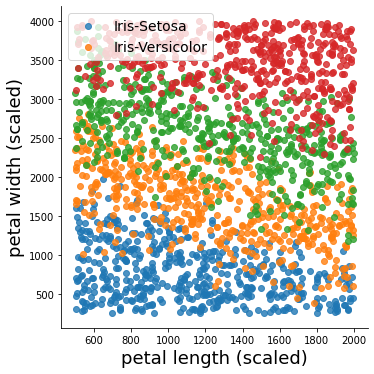

In [34]:
sns.lmplot(x='battery_power',y='ram',hue='price_range',data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.show()